In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
wine = pd.read_csv('save_total.csv')
df = wine.copy()

In [64]:
df['quality'] = df['quality'].apply(lambda x: '나쁨' if x <= 5 else '좋음')

In [83]:
X=df.drop('quality',axis=1)
y=df['quality']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=13)

In [84]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=13)

In [85]:
knn.score(X_test,y_test), knn.score(X_train,y_train)

(0.75, 0.7801287948482061)

In [68]:
acc_test=[]
acc_train=[]
for i in range(1,100):
    knn_k = KNeighborsClassifier(n_neighbors=i)
    knn_k.fit(X_train, y_train)
    acc_test.append(knn_k.score(X_test, y_test))
    acc_train.append(knn_k.score(X_train, y_train))

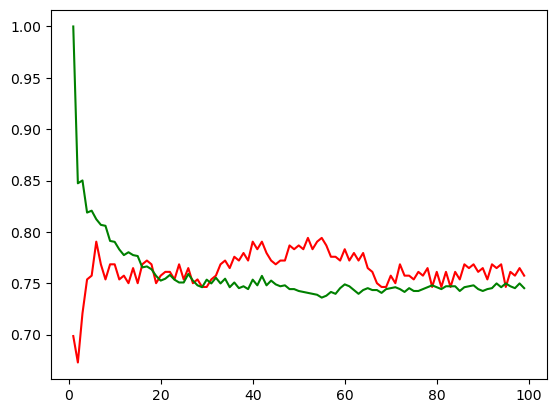

In [69]:
plt.plot(range(1,100), acc_test,'r')
plt.plot(range(1,100), acc_train, 'g')

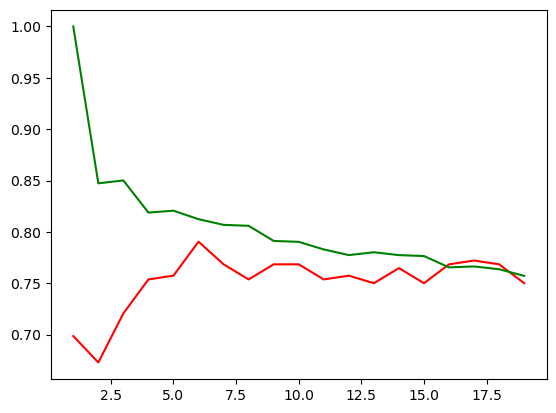

In [71]:
acc_test=[]
acc_train=[]
for i in range(1,20):
    knn_k = KNeighborsClassifier(n_neighbors=i)
    knn_k.fit(X_train, y_train)
    acc_test.append(knn_k.score(X_test, y_test))
    acc_train.append(knn_k.score(X_train, y_train))
    
plt.plot(range(1,20), acc_test,'r')
plt.plot(range(1,20), acc_train, 'g')

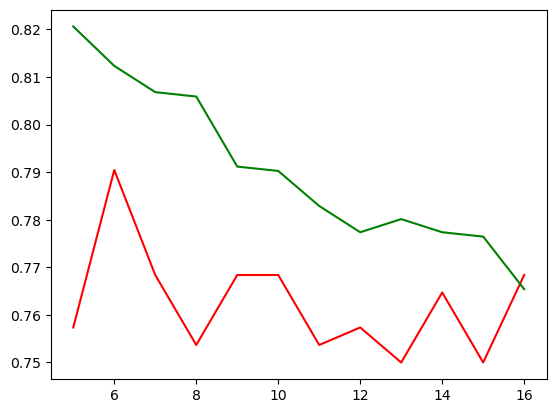

In [72]:
acc_test=[]
acc_train=[]
for i in range(5,17):
    knn_k = KNeighborsClassifier(n_neighbors=i)
    knn_k.fit(X_train, y_train)
    acc_test.append(knn_k.score(X_test, y_test))
    acc_train.append(knn_k.score(X_train, y_train))
    
plt.plot(range(5,17), acc_test,'r')
plt.plot(range(5,17), acc_train, 'g')

In [31]:
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 그리드 정의
param_grid = {'n_neighbors': range(1, 100)}

# KNN 분류기 생성
knn = KNeighborsClassifier()

# GridSearchCV 객체 생성
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# 그리드 서치를 데이터에 맞춤
grid_search.fit(X_train, y_train)

# 최적의 파라미터와 최적의 정확도 얻기
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print(f'최적의 파라미터: {best_params}')
print(f'최적의 정확도: {best_accuracy:.4f}')


최적의 파라미터: {'n_neighbors': 8}
최적의 정확도: 0.5786


In [30]:
# 최적의 모델로 테스트 세트에서 정확도 계산
test_accuracy = grid_search.best_estimator_.score(X_test, y_test)
print("Test Accuracy of Best Model:", test_accuracy)

Test Accuracy of Best Model: 0.5919117647058824


In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

# 하이퍼파라미터 그리드 정의
param_grid = {'n_neighbors': range(1, 100)}

# KNN 분류기 생성
knn = KNeighborsClassifier()

# GridSearchCV 객체 생성
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1_weighted')  # 또는 'f1_micro'로 설정 가능

# 그리드 서치를 데이터에 맞춤
grid_search.fit(X_train, y_train)

# 최적의 파라미터와 최적의 F1 점수 얻기
best_params = grid_search.best_params_
best_f1 = grid_search.best_score_

print(f'최적의 파라미터: {best_params}')
print(f'최적의 F1 점수: {best_f1:.4f}')


최적의 파라미터: {'n_neighbors': 8}
최적의 F1 점수: 0.5557


In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

# 하이퍼파라미터 그리드 정의
param_grid = {'n_neighbors': range(1, 100)}

# KNN 분류기 생성
knn = KNeighborsClassifier()

# GridSearchCV 객체 생성
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1_micro')  # 또는 'f1_micro'로 설정 가능

# 그리드 서치를 데이터에 맞춤
grid_search.fit(X_train, y_train)

# 최적의 파라미터와 최적의 F1 점수 얻기
best_params = grid_search.best_params_
best_f1 = grid_search.best_score_

print(f'최적의 파라미터: {best_params}')
print(f'최적의 F1 점수: {best_f1:.4f}')


최적의 파라미터: {'n_neighbors': 8}
최적의 F1 점수: 0.5786


-------------------------------------------------------------------

# 맨하튼 거리

In [61]:
# 맨하탄 거리를 사용하는 KNeighborsClassifier 생성
knn_manhattan = KNeighborsClassifier(n_neighbors=17, metric='manhattan')
knn_manhattan.fit(X_train, y_train)

knn_manhattan.score(X_test,y_test), knn_manhattan.score(X_train,y_train)

(0.6176470588235294, 0.6145354185832567)

In [41]:
acc_test=[]
acc_train=[]
for i in range(1,100):
    knn_k = KNeighborsClassifier(n_neighbors=i, metric='manhattan')
    knn_k.fit(X_train, y_train)
    acc_test.append(knn_k.score(X_test, y_test))
    acc_train.append(knn_k.score(X_train, y_train))

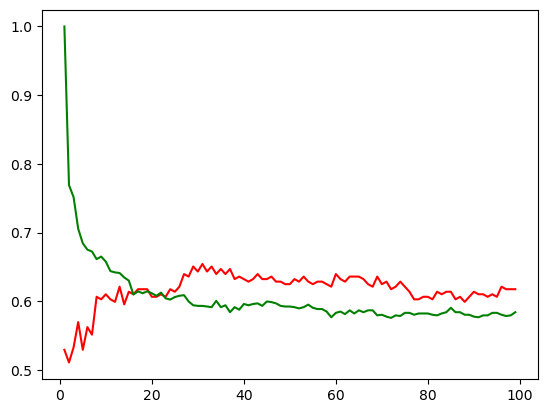

In [42]:
plt.plot(range(1,100), acc_test,'r')
plt.plot(range(1,100), acc_train, 'g')

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# 하이퍼파라미터 그리드 정의
param_grid = {'n_neighbors': range(1, 100)}

# KNN 분류기 생성 (맨하튼 거리를 사용하려면 metric='manhattan' 설정)
knn = KNeighborsClassifier(metric='manhattan')

# GridSearchCV 객체 생성
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# 그리드 서치를 데이터에 맞춤
grid_search.fit(X_train, y_train)

# 최적의 파라미터와 최적의 정확도 얻기
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print(f'최적의 파라미터: {best_params}')
print(f'최적의 정확도: {best_accuracy:.4f}')


최적의 파라미터: {'n_neighbors': 40}
최적의 정확도: 0.5722


In [44]:
# 최적의 모델로 테스트 세트에서 정확도 계산
test_accuracy = grid_search.best_estimator_.score(X_test, y_test)
print("Test Accuracy of Best Model:", test_accuracy)

Test Accuracy of Best Model: 0.6323529411764706


In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# 하이퍼파라미터 그리드 정의
param_grid = {'n_neighbors': range(1, 100)}

# KNN 분류기 생성 (맨하튼 거리를 사용하려면 metric='manhattan' 설정)
knn = KNeighborsClassifier(metric='manhattan')

# GridSearchCV 객체 생성
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1_weighted')  # 또는 'f1_micro'로 설정 가능

# 그리드 서치를 데이터에 맞춤
grid_search.fit(X_train, y_train)

# 최적의 파라미터와 최적의 F1 점수 얻기
best_params = grid_search.best_params_
best_f1 = grid_search.best_score_

print(f'최적의 파라미터: {best_params}')
print(f'최적의 F1 점수: {best_f1:.4f}')


최적의 파라미터: {'n_neighbors': 6}
최적의 F1 점수: 0.5452


In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# 하이퍼파라미터 그리드 정의
param_grid = {'n_neighbors': range(1, 100)}

# KNN 분류기 생성 (맨하튼 거리를 사용하려면 metric='manhattan' 설정)
knn = KNeighborsClassifier(metric='manhattan')

# GridSearchCV 객체 생성
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1_micro')  # 또는 'f1_micro'로 설정 가능

# 그리드 서치를 데이터에 맞춤
grid_search.fit(X_train, y_train)

# 최적의 파라미터와 최적의 F1 점수 얻기
best_params = grid_search.best_params_
best_f1 = grid_search.best_score_

print(f'최적의 파라미터: {best_params}')
print(f'최적의 F1 점수: {best_f1:.4f}')


최적의 파라미터: {'n_neighbors': 40}
최적의 F1 점수: 0.5722
